# **Hyperparameter Tuning**
---

**This notebook performs hyperparameter tuning for a decision tree classifier using individual training and computing the training and testing AUC scores for various hyperparameters. The tuned model is then compared to the model obtained through grid search to determine the optimal hyperparameters.**

Hyperparameters of Decision Tree:

- [**max_depth**](###max_depth) : Maximum depth of the Tree.
- [**min_samples_split**](###min_samples_split) : Minimum number of samples required to split an internal node.
- [**max_features**](###max_features) : Maximum features to use to build decision Tree.
- [**min_samples_leaf**](###min_samples_leaf) : Minimum number of samples required to be at a leaf node.

[**GridSearch CV (Hyperparameter Tuning)**](###GridSearch-CV-(Hyperparameter-Tuning)) : Finding the optimal hyperparameters using GridSearchCV.

[**Final prediction**](###Tuned-Model-(tree)) : Tuned Model with optimal values of hyperparameters found using individual training and computing the training and testing AUC scores for various hyperparameters.



In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_auc_score,
                             classification_report,
                             precision_recall_curve,
                             PrecisionRecallDisplay,
                             roc_curve,
                             RocCurveDisplay)
from sklearn.model_selection import GridSearchCV,StratifiedKFold


# setting the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

In [2]:
# loading dataset
data_dir = r"E:\Machine learning\Machine Learning Project\Breast-Cancer-Prediction-with-Decision-Tree-Classifier\data\processed"


def load_data(filename):
    filepath = os.path.join(data_dir, filename)
    with open(filepath, "rb") as f:
        return pickle.load(f)


x_train, y_train = load_data("n_dim_training.pkl")
x_test, y_test = load_data("n_dim_testing.pkl")

print(f"{x_train.shape = }, {y_train.shape = }")
print(f"{x_test.shape = }, {y_test.shape = }")

x_train.shape = (455, 15), y_train.shape = (455,)
x_test.shape = (114, 15), y_test.shape = (114,)


Base Example:

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',
                             random_state=42,max_depth=3)
clf.fit(x_train,y_train)
# taking the probability of the positive class i.e. Malignant
y_pred_proba = clf.predict_proba(x_test)[:,1]

# classification metric
roc_auc_score(y_test, y_pred_proba)

0.9705207992138879

Defining functions to retreive auc score i.e. `get_model_scores` & `plot_AUC_scores` for plotting the results.

In [3]:
# retrieve the AUC scores for each hyperparameter
def get_model_scores(model):
    model.fit(x_train,y_train)

    y_pred_train = model.predict_proba(x_train)
    training_score = roc_auc_score(y_train,y_pred_train[:,1])

    y_pred_test = model.predict_proba(x_test)
    testing_score = roc_auc_score(y_test,y_pred_test[:,1])

    return training_score,testing_score


# to plot the AUC scores
def plot_AUC_scores(training_scores,
                    testing_scores,
                    param:str,param_arr):
    plt.figure(figsize=(10,5))
    sns.lineplot(x=param_arr,y=training_scores,label='training_score',color='purple')
    sns.lineplot(x=param_arr,y=testing_scores,label='testing_score',color='red')
    plt.xlabel(param)
    plt.ylabel('AUC score')
    plt.title(f'AUC score for {param}')
    plt.tight_layout()
    plt.show()

## **Hyperparameters of Decision Tree**
---

### **max_depth**

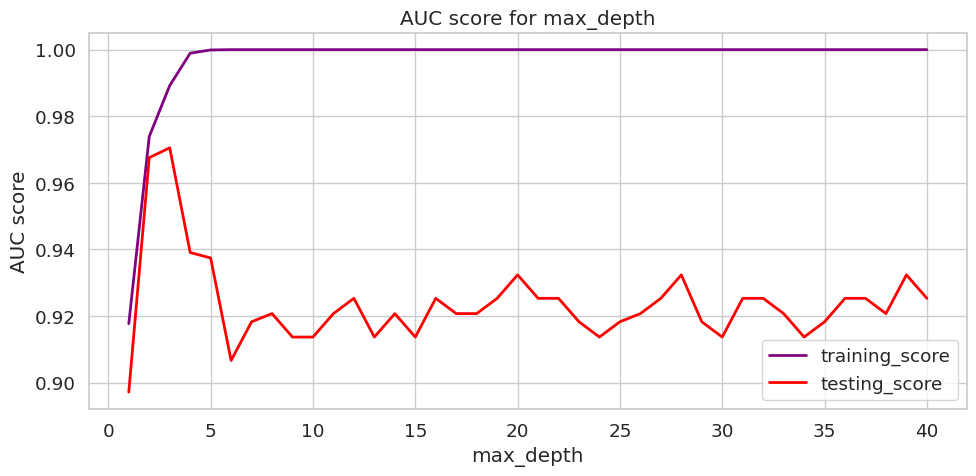

In [ ]:
# Maximum depth of the Tree.

depths = range(1,41)
training_res = []
testing_res = []
for val in depths:
    clf = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=val)
    train_score,test_score = get_model_scores(model=clf)
    training_res.append(train_score)
    testing_res.append(test_score)

max_depth_res = {'training_res':training_res,
                 'testing_res':testing_res}

# plotting AUC scores
plot_AUC_scores(training_scores=training_res,
                testing_scores=testing_res,
                param='max_depth',param_arr=depths)


>**The training AUC score increases with the `max_depth` and eventually reaches 1.0, indicating potential overfitting.The optimal `max_depth` appears to be around 3-5.**

### **min_samples_split**

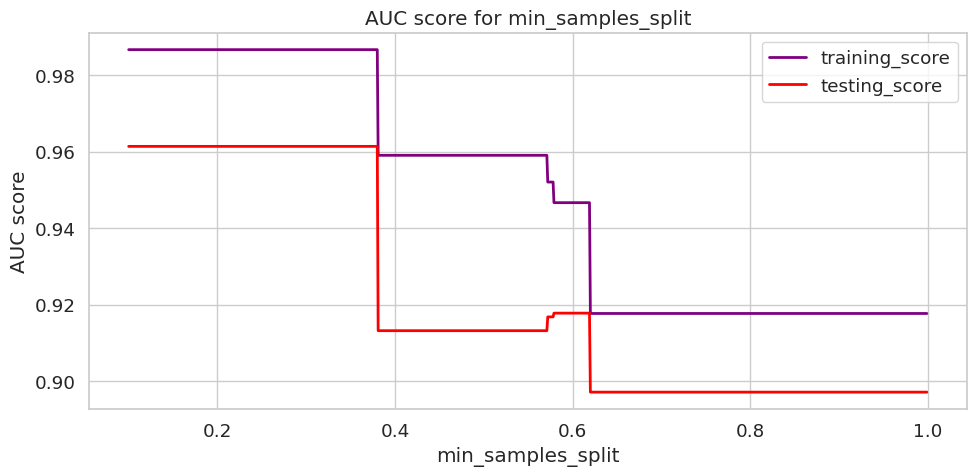

In [ ]:
# Minimum number of samples required to split a decision node.

samples_split = np.arange(0.1,1,0.001)

training_res = []
testing_res = []
for val in samples_split:
    clf = DecisionTreeClassifier(criterion='entropy',
                                 min_samples_split=val)
    train_score,test_score = get_model_scores(model=clf)
    training_res.append(train_score)
    testing_res.append(test_score)

min_samples_split_res = {'training_res':training_res,
                 'testing_res':testing_res}

plot_AUC_scores(training_scores=training_res,
                testing_scores=testing_res,
                param='min_samples_split',param_arr=samples_split)


> **Initially, the model performs well with a low `min_samples_split` value, but the gap between training and testing AUC scores suggests overfitting. Overall, no clear pattern emerges, indicating that this hyperparameter may not have a significant impact.**

#### **max_features**


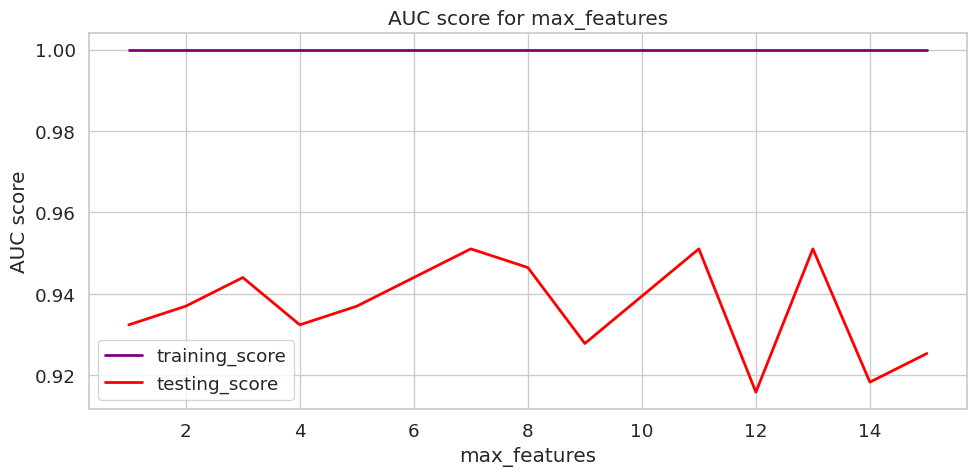

In [ ]:
# Maximum features to use to build decision Tree.

n_features = range(1,16)

training_res = []
testing_res = []
for val in n_features:
    clf = DecisionTreeClassifier(criterion='entropy',
                                 max_features=val)
    train_score,test_score = get_model_scores(model=clf)
    training_res.append(train_score)
    testing_res.append(test_score)

max_features_res = {'training_res':training_res,
                   'testing_res':testing_res}

plot_AUC_scores(training_scores=training_res,
                testing_scores=testing_res,
                param='max_features',param_arr=n_features)

> **The training AUC score remains relatively stable across different `max_features` values, suggesting redundant data in the dataset. However, fluctuations in the testing AUC score indicate that some features are more relevant than others. Using `sqrt` or `log2` for selecting features might provide better generalization compared to using all features.**




### **min_sample_leaf**

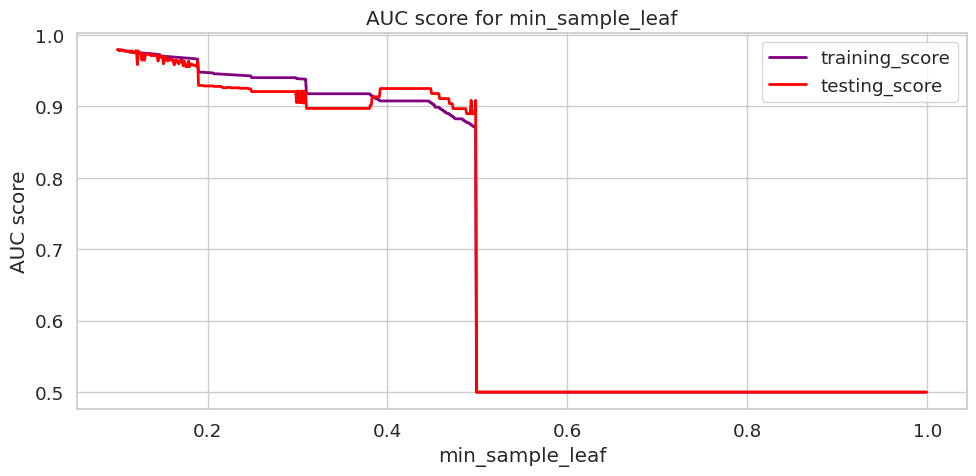

In [ ]:
# The minimum samples required to be a leaf node.

sample_leaf = np.arange(0.1,1,0.001)
training_res = []
testing_res = []
for val in sample_leaf:
    clf = DecisionTreeClassifier(criterion='entropy',
                                 min_samples_leaf=val)
    train_score,test_score = get_model_scores(model=clf)
    training_res.append(train_score)
    testing_res.append(test_score)

min_sample_leaf_res = {'training_res':training_res,
                       'testing_res':testing_res}

plot_AUC_scores(training_scores=training_res,
                testing_scores=testing_res,
                param='min_sample_leaf',param_arr=sample_leaf)

> **As `min_samples_leaf` increases, the model becomes increasingly underfit, leading to a decline in both training and testing AUC scores. This suggests that using a low value for `min_samples_leaf` is preferable to ensure the model captures sufficient information from the data.**

## **GridSearch CV (Hyperaparameter Tuning)**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',
                             random_state=42) # Fixed random state for reproducibility

# defining the param grid to search
param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_split': np.arange(0.1,0.2,0.001),
    'min_samples_leaf': np.arange(0.1,0.2,0.001),
    'max_features': ['sqrt', 'log2', None],
}

# KFold object
kf = StratifiedKFold(n_splits=5, # k-1 folds for training
                     shuffle=True,
                     random_state=42)

# initializing grid_search object
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1',
    cv=kf,
    n_jobs=-1,
    verbose=2
)

# fitting the training dataset
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 270000 candidates, totalling 1350000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.1...
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199])},
             scoring='f1', verbose=2)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"{auc_score=}")

Best hyperparameters: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
auc_score=0.8974778905994105


In [ ]:
y_pred = best_model.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.91      0.96      0.93        71
           M       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



**Although the tuned model `best_model` didn't give the best results with auc score of 0.897. The hyperparameter values we found through individual training and computing the training and testing auc gave better results as shown below.**

## **Tuned Model (tree)**

In [5]:
# using optimal values of hyperparameters found using individual training

tree = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=3,
                                 min_samples_split=0.01,
                                 min_samples_leaf=0.01,
                                 random_state=42)
tree.fit(x_train,y_train)
auc_score = roc_auc_score(y_test, tree.predict_proba(x_test)[:, 1])

y_pred = tree.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred)
print(report)
print("AUC score: {:.3f}".format(auc_score))

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC score: 0.957


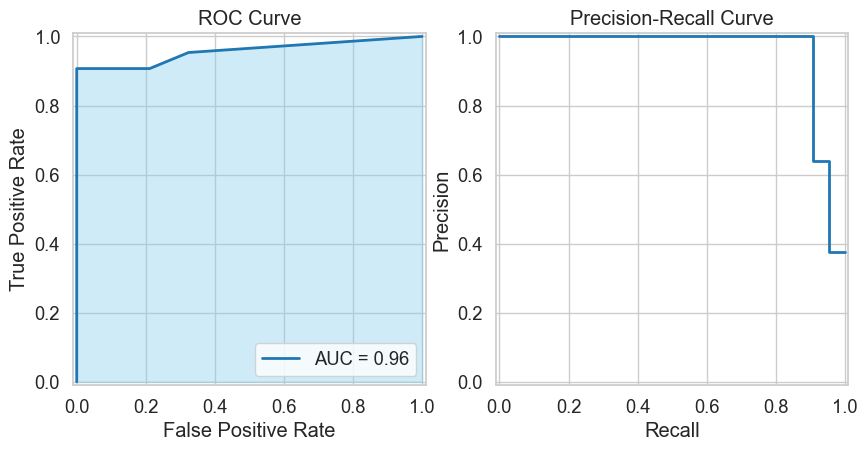

In [6]:
# calculating true positive rate i.e. Recall & false positive rate i.e. 1-specificity
fpr, tpr, _ = roc_curve(y_test,
                        tree.predict_proba(x_test)[:, 1],
                        pos_label='M')

# calculating precision,recall
precision, recall, _ = precision_recall_curve(y_test,
                                              tree.predict_proba(x_test)[:, 1],
                                              pos_label='M')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
roc_display.plot(ax=ax1)
ax1.set_title('ROC Curve')
ax1.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.4)
# Precision-Recall curve
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(ax=ax2)
ax2.set_title('Precision-Recall Curve')

plt.show()

In [ ]:
# storing the model in the directory
dir_path = "E:\Machine learning\Machine Learning Project\Breast-Cancer-Prediction-with-Decision-Tree-Classifier\models"
file_path = os.path.join(dir_path,"model.pkl")
with open(file_path,"wb") as file:
    pickle.dump(tree,file)